In [1]:
#KAGGLE DAN VERİYİ ALARAK PROJEYİ ÇÖZECEĞİZ

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C181P142ThinF_IMG_20151127_155722_cell_78.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C202ThinF_IMG_20151015_151736_cell_123.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C99P60ThinF_IMG_20150918_141351_cell_22.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C186P147NThinF_IMG_20151203_150322_cell_90.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C94P55ThinF_IMG_20150821_165519_cell_55.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C218ThinF_IMG_20151106_144143_cell_170.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C67P28N_ThinF_IMG_20150819_115955_cell_13.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/test/uninfected/C114P75ThinF_IMG_20150930_150057_cell_135.png
/kaggle/input/cell-images-parasitized-or-not/cell_images/

In [2]:
# YAPILMIŞ BİR PROJEDEN YARDIM ALINDI

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from matplotlib.image import imread

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
data_dir = '../input/cell-images-parasitized-or-not/cell_images'
print(os.listdir(data_dir))

['test', 'train']


In [13]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [14]:
print(os.listdir(test_path))

['uninfected', 'parasitized']


In [15]:
print(os.listdir(train_path))

['uninfected', 'parasitized']


In [16]:
parasitized_cell = train_path + '/parasitized/'
# os.listdir(parasitized_cell)

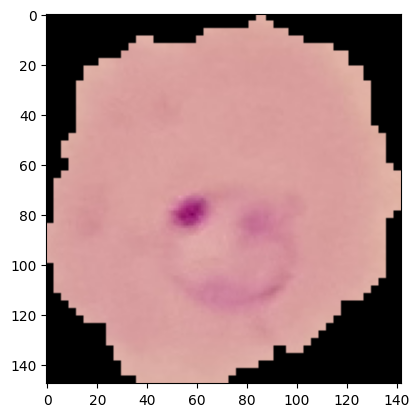

In [17]:
plt.imshow(imread(parasitized_cell + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))
plt.show()

In [18]:
uninfected_cell = train_path + '/uninfected/'
# os.listdir(uninfected_cell)

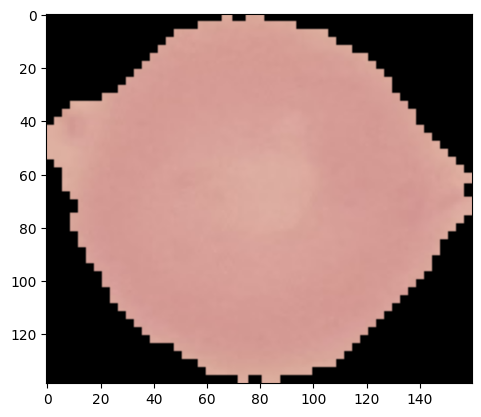

In [19]:
plt.imshow(imread(uninfected_cell + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'))
plt.show()

In [20]:
#Resimlerin boyutlarını kontrol edelim

In [21]:
dim1 = []
dim2 = []

for read_img in os.listdir(test_path + '/uninfected/'):
    img = imread(test_path + '/uninfected/' + read_img)
    d1,d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape = (130,130,3)

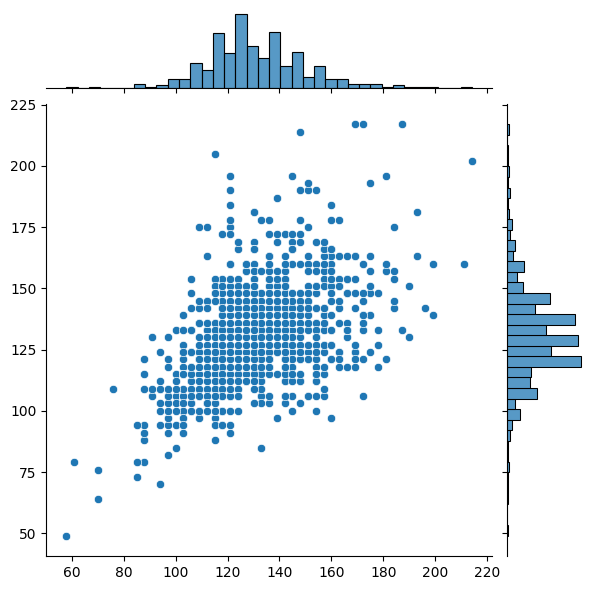

In [25]:
sns.jointplot(x=dim1, y=dim2)
plt.show()

In [26]:
#Veri Ön İşleme veya Görüntü Büyütme

In [27]:
data_img_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, 
                                  height_shift_range= 0.1, shear_range=0.1, 
                                  zoom_range=0.1, fill_mode='nearest', 
                                  horizontal_flip=True ) 

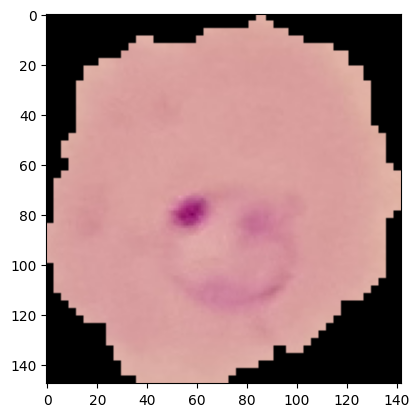

In [28]:
para_image = imread(parasitized_cell+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(para_image)
plt.show()

In [29]:
data_img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [30]:
data_img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [31]:
#CNN Modu Oluştur

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)       

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [37]:
batch_size = 16

In [38]:
image_shape[:2]

(130, 130)

In [39]:
train_img_gen = data_img_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                class_mode='binary',
                                                batch_size=batch_size)

Found 24958 images belonging to 2 classes.


In [40]:
test_img_gen = data_img_gen.flow_from_directory(test_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [44]:
model.fit(train_img_gen, validation_data=(test_img_gen), epochs=20, callbacks=early_stop)

Epoch 1/20
1560/1560 [==============================] - 351s 225ms/step - loss: 0.1630 - accuracy: 0.9489 - val_loss: 0.1995 - val_accuracy: 0.9408
Epoch 2/20
1560/1560 [==============================] - 354s 227ms/step - loss: 0.1605 - accuracy: 0.9508 - val_loss: 0.1614 - val_accuracy: 0.9485
Epoch 3/20
1560/1560 [==============================] - 340s 218ms/step - loss: 0.1660 - accuracy: 0.9492 - val_loss: 0.1792 - val_accuracy: 0.9438
Epoch 4/20
1560/1560 [==============================] - 339s 217ms/step - loss: 0.1652 - accuracy: 0.9489 - val_loss: 0.1912 - val_accuracy: 0.9423
Epoch 5/20
1560/1560 [==============================] - 339s 217ms/step - loss: 0.1661 - accuracy: 0.9498 - val_loss: 0.1652 - val_accuracy: 0.9477
Epoch 6/20
1560/1560 [==============================] - 339s 217ms/step - loss: 0.1689 - accuracy: 0.9483 - val_loss: 0.1725 - val_accuracy: 0.9419
Epoch 7/20
1560/1560 [==============================] - 344s 220ms/step - loss: 0.1650 - accuracy: 0.9479 - val_

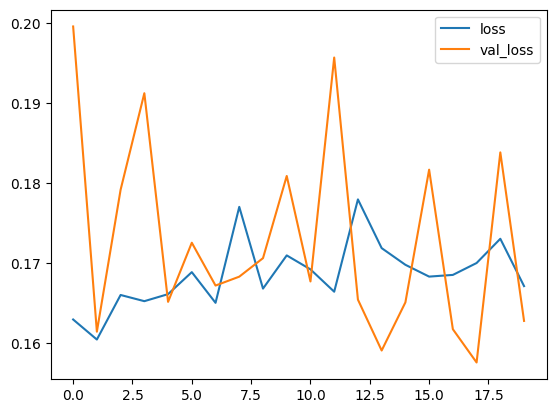

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss','val_loss']].plot()
plt.show()

In [46]:
y_pred = model.predict(test_img_gen)

163/163 [==============================] - 21s 126ms/step


In [47]:
training_loss = model.evaluate(train_img_gen)
testing_loss = model.evaluate(test_img_gen)

163/163 [==============================] - 21s 126ms/step - loss: 0.1645 - accuracy: 0.9450


In [48]:
training_loss

[0.1575765609741211, 0.9505168795585632]

In [49]:
testing_loss

[0.16449308395385742, 0.9449999928474426]

In [50]:
#Tek bir görüntü nasıl tahmin edilir

In [51]:
par_cell = data_dir + '/test/' + '/parasitized/' + 'C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

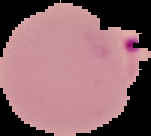

In [52]:
image.load_img(par_cell)

In [53]:
type(image.load_img(par_cell))

PIL.PngImagePlugin.PngImageFile

In [54]:
my_image = image.load_img(par_cell, target_size=(130,130,3))

In [55]:
my_image_arr = np.array(my_image)

In [56]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [57]:
model.predict(my_image_arr)

1/1 [==============================] - 0s 104ms/step


array([[0.00970827]], dtype=float32)

In [58]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}